<a href="https://colab.research.google.com/github/chamudithamk/ME422-B2-Lab-Group/blob/main/Vibration/E_20_218_Vibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Activity 1**

Derive the 2-dof freedom model that will capture the first two
dominant modes of small amplitude vibration of the system.
Consider the schematic diagram of the experimental setup illustrated below along with the corresponding notations

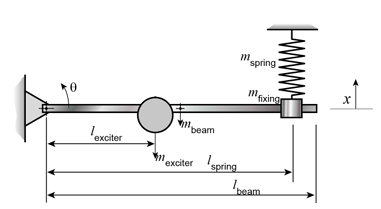

Assuming negligible damping and small-amplitude vibrations, the dynamic behavior of the system can be accurately represented by the solution of the governing partial differential equation given below

$$
\frac{\partial^2 y}{\partial t^2}
+ \frac{EI}{\rho A}\frac{\partial^4 y}{\partial x^4}
+ \frac{P}{\rho A}\frac{\partial^2 y}{\partial x^2}
= q(t,x)
$$


Here,
𝑦
y represents the transverse displacement of the beam,
𝑃
P is the axial compressive force,
𝜌
ρ is the material density,
𝐸
E is Young’s modulus,
𝐼
I is the second moment of area, and
𝐴
A is the cross-sectional area of the uniform beam. In this section, the axial load is assumed to be constant


since Axial force is zero, apply P = 0

$$
\frac{\partial^2 y}{\partial t^2}
+ \frac{EI}{\rho A}\frac{\partial^4 y}{\partial x^4}
= q(t,x)
$$


The solutions of the governing PDE that satisfy the boundary conditions

$$
y(0,t)=0, \quad y(L,t)=0,
$$

$$
\frac{\partial^2 y}{\partial x^2}(0,t)=0, \quad \frac{\partial^2 y}{\partial x^2}(L,t)=0
$$


accurately represent the physical behavior of the beam, where
𝐿
L is the beam length

Let 𝓕 denote the infinite-dimensional vector space of twice differentiable functions defined on the interval \([0, L]\).

Define the linear operator \(H : \mathcal{F} \rightarrow \mathcal{F}\) by

$$
H = \frac{EI}{\rho A}\frac{\partial^4}{\partial x^4}.
$$

Then, the equation of motion can be written as

$$
\frac{\partial^2 y}{\partial t^2} + Hy = q(t,x).
$$


The operator \(H\) maps a transverse deflection profile to the corresponding acceleration generated purely by beam bending, subject to the boundary conditions of the beam.

Let \(H\) possess distinct positive eigenvalues \(\{\omega_k^2\}_{k=1}^{\infty}\), with associated eigenfunctions \(\{\psi_k(x)\}_{k=1}^{\infty}\), which represent the vibration mode shapes of the system.

The corresponding eigenvalue problem is defined as

$$
H\psi_k(x) = \omega_k^2 \psi_k(x).
$$

Substituting the definition of the operator \(H\), we obtain

$$
\frac{EI}{\rho A}\frac{d^4 \psi_k(x)}{dx^4} = \omega_k^2 \psi_k(x).
$$

This expression can be rearranged as

$$
\frac{d^4 \psi_k(x)}{dx^4}
=
\frac{\rho A \omega_k^2}{EI}\psi_k(x)
=
\beta_k^4 \psi_k(x).
$$


We define the modal parameter as  

$$
\beta_k^4 = \frac{\rho A \omega_k^2}{E I}
$$

The general solution of the fourth-order differential equation is  

$$
\psi_k(x) = A_k \cosh(\beta_k x) + B_k \sinh(\beta_k x)
+ C_k \cos(\beta_k x) + D_k \sin(\beta_k x)
$$

where $A_k, B_k, C_k,$ and $D_k$ are constants determined from the boundary conditions.



### Boundary conditions at the fixed end $x=0$

$$
\psi_k(0) = 0 \Rightarrow A_k + C_k = 0
$$

$$
\psi_k'(0) = \beta_k (B_k + D_k)
$$

$$
\psi_k''(0) = \beta_k^2 (A_k - C_k)
$$

Since $C_k = -A_k$, substitution gives

$$
EI\beta_k^2 (A_k - C_k) - k_0\beta_k (B_k + D_k) = 0
$$

$$
2EI\beta_k^2 A_k - k_0\beta_k (B_k + D_k) = 0
$$



### Boundary conditions at the free end $x=L$

$$
\psi_k'(L) = 0
$$

$$
A_k[\cosh(\beta_k L) + \cos(\beta_k L)]
+ B_k \sinh(\beta_k L)
- D_k \sin(\beta_k L) = 0
$$

$$
\psi_k''(L) = 0
$$

$$
A_k[\sinh(\beta_k L) - \sin(\beta_k L)]
+ B_k \cosh(\beta_k L)
- D_k \cos(\beta_k L) = 0
$$


These equations form a homogeneous system:

$$
\mathbf{H}(\beta_k)
\begin{bmatrix}
A_k \\
B_k \\
D_k
\end{bmatrix}
= \mathbf{0}
$$

For non-trivial solutions,

$$
\det(\mathbf{H}(\beta_k)) = 0
$$

Solving this yields the eigenvalues $\beta_k$ and corresponding mode shapes.


In [8]:
import numpy as np
from numpy.linalg import det
from scipy.linalg import svd
from scipy.optimize import brentq

# -------------------------------------------------
# Determinant of boundary condition matrix
# Used to extract beam eigenvalues (beta)
# -------------------------------------------------

def characteristic_eq(beta, L, EI, k_rot):
    s = beta * L

    mat = np.array([
        [2*EI*beta**2, -k_rot*beta, -k_rot*beta],
        [np.cosh(s) + np.cos(s), np.sinh(s), -np.sin(s)],
        [np.sinh(s) - np.sin(s), np.cosh(s), -np.cos(s)]
    ])

    return det(mat)

# -------------------------------------------------
# Locate first few beta roots using sign changes
# -------------------------------------------------

def find_beta_values(L, EI, k_rot, how_many=2, beta_limit=50):
    beta_range = np.linspace(1e-4, beta_limit, 5000)
    det_values = [characteristic_eq(b, L, EI, k_rot) for b in beta_range]

    beta_roots = []

    for i in range(len(beta_range) - 1):
        if det_values[i] * det_values[i + 1] < 0:
            root = brentq(characteristic_eq,
                          beta_range[i],
                          beta_range[i + 1],
                          args=(L, EI, k_rot))
            beta_roots.append(root)

        if len(beta_roots) >= how_many:
            break

    return np.array(beta_roots)

# -------------------------------------------------
# Extract A, B, C, D constants for mode shape
# -------------------------------------------------

def compute_mode_constants(beta, L, EI, k_rot):
    s = beta * L

    mat = np.array([
        [2*EI*beta**2, -k_rot*beta, -k_rot*beta],
        [np.cosh(s) + np.cos(s), np.sinh(s), -np.sin(s)],
        [np.sinh(s) - np.sin(s), np.cosh(s), -np.cos(s)]
    ])

    _, _, V = svd(mat)
    vec = V[-1]            # smallest singular vector

    A, B, D = vec
    C = -A

    return A, B, C, D


The eigenvalues of the operator \(H\) are given by

$$
\{\omega_k^2\}_{k=1}^{\infty}
=
\left\{
\frac{EI}{\rho A}\beta_k^4
\right\}_{k=1}^{\infty}.
$$

Here, the parameters \(\beta_k\) are obtained from the numerical solution of the characteristic equation.

The corresponding eigenfunctions (mode shapes) are given by

$$
\{\psi_k(x)\}_{k=1}^{\infty}
=
\left\{
C_{1k} e^{\beta_k x}
+ C_{2k} e^{-\beta_k x}
+ C_{3k} \cos(\beta_k x)
+ C_{4k} \sin(\beta_k x)
\right\}_{k=1}^{\infty}.
$$

The constants \(C_{1k}\), \(C_{2k}\), \(C_{3k}\), and \(C_{4k}\) are determined using the numerical procedure implemented earlier.


**Forced Vibration**

When the oscillator is switched on, the system experiences forced vibration as a result of the oscillating force
𝑄
Q.

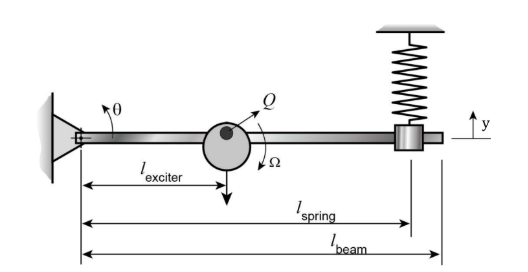

In the absence of base excitation, the external load acting on the beam is assumed to be

$$
q(x,t) = Q \sin(\Omega t)\,\delta(x - l_{\text{exciter}}).
$$

The system can then be modeled as a set of decoupled, forced, and damped single-degree-of-freedom oscillators for each vibration mode \(k\), such that

$$
\ddot{y} + C\dot{y} + Hy = q(x,t)
$$

which leads to the modal equation

$$
m_k \ddot{z}_k + 2\zeta_k \omega_k m_k \dot{z}_k + m_k \omega_k^2 z_k
= \langle \psi_k(x), q(x,t) \rangle.
$$

Here, the modal damping ratio and modal mass are defined as

$$
\zeta_k = \frac{c}{2\omega_k},
$$

$$
m_k = \int_{0}^{l_{\text{beam}}} \rho A\,\psi_k^2(x)\,dx.
$$

The modal masses normalize the arbitrary scaling introduced by the choice of the mode shape coefficients.

Solving the decoupled ordinary differential equation for each mode \(k\) yields the steady-state response

$$
z_k(t) = X_k(\Omega)\cos\!\big(\Omega t + \phi_k(\Omega)\big),
$$

where $X_k(\Omega)$ denotes the steady-state amplitude and $\phi_k(\Omega)$ represents the phase lag of the $k$th modal coordinate at the forcing frequency $\Omega$.


Let us now derive explicit expressions for the quantities defined above.

The mode shapes are orthonormal with respect to the inner product defined as

$$
\langle \psi_k(x), q(x,t) \rangle
=
\int_{0}^{l_{\text{beam}}} \psi_k(x)\,q(x,t)\,dx.
$$

Substituting the expression for the external forcing,

$$
q(x,t) = Q\sin(\Omega t)\,\delta(x - l_{\text{exciter}}),
$$

the inner product becomes

$$
\langle \psi_k(x), q(x,t) \rangle
=
\int_{0}^{l_{\text{beam}}} \psi_k(x)\,Q\sin(\Omega t)\,
\delta(x - l_{\text{exciter}})\,dx.
$$

Evaluating the integral using the sifting property of the Dirac delta function yields

$$
\langle \psi_k(x), q(x,t) \rangle
=
Q\sin(\Omega t)\,\psi_k(l_{\text{exciter}}).
$$

By definition, the steady-state amplitude of the $k$th modal coordinate is given by

$$
X_k(\Omega)
=
\frac{\left|\langle \psi_k(x), q(x,t) \rangle\right|}
{m_k\sqrt{(\omega_k^2-\Omega^2)^2 + 4\zeta_k^2\Omega^2\omega_k^2}}.
$$

Substituting the evaluated modal force term gives

$$
X_k(\Omega)
=
\frac{Q\,\psi_k(l_{\text{exciter}})}
{m_k\sqrt{(\omega_k^2-\Omega^2)^2 + 4\zeta_k^2\Omega^2\omega_k^2}}.
$$

The corresponding phase lag for the $k$th mode is expressed as

$$
\phi_k(\Omega)
=
\arctan\!\left(
\frac{2\zeta_k\Omega\omega_k}{\omega_k^2-\Omega^2}
\right).
$$

The infinite-dimensional response of the system can therefore be written as

$$
y(t,x)
=
\sum_{k=1}^{\infty} z_k(t)\psi_k(x)
=
\sum_{k=1}^{\infty}
X_k(\Omega)\cos\!\big(\Omega t + \phi_k(\Omega)\big)\psi_k(x).
$$


**Reduction to a 2-DOF Model with a Localized Spring–Damper Attachment**

By truncating the infinite-dimensional response to the first two dominant vibration modes, the transverse displacement of the beam can be approximated as

$$
y(t,x) \approx
X_1(\Omega)\cos\!\big(\Omega t + \phi_1(\Omega)\big)\psi_1(x)
+
X_2(\Omega)\cos\!\big(\Omega t + \phi_2(\Omega)\big)\psi_2(x).
$$

The corresponding two-degree-of-freedom system can be expressed in matrix form as

$$
\underbrace{
\begin{bmatrix}
m_1 & 0 \\
0 & m_2
\end{bmatrix}
}_{M_{\text{beam}}}
\begin{bmatrix}
\ddot{z}_1 \\
\ddot{z}_2
\end{bmatrix}
+
\underbrace{
\begin{bmatrix}
2\zeta_1\omega_1 m_1 & 0 \\
0 & 2\zeta_2\omega_2 m_2
\end{bmatrix}
}_{C_{\text{beam}}}
\begin{bmatrix}
\dot{z}_1 \\
\dot{z}_2
\end{bmatrix}
+
\underbrace{
\begin{bmatrix}
\omega_1^2 m_1 & 0 \\
0 & \omega_2^2 m_2
\end{bmatrix}
}_{K_{\text{beam}}}
\begin{bmatrix}
z_1 \\
z_2
\end{bmatrix}
=
\underbrace{
\begin{bmatrix}
Q\,\psi_1(l_{\text{exciter}})\sin(\Omega t) \\
Q\,\psi_2(l_{\text{exciter}})\sin(\Omega t)
\end{bmatrix}
}_{F_{\text{exciter}}}.
$$

The effects of the localized spring and viscous damper attachment are incorporated in the subsequent formulation.


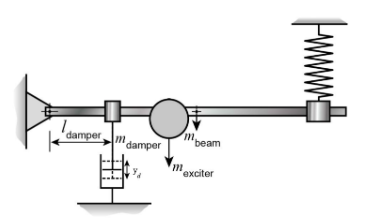

**Part I: Inclusion of Additional Mass Effects**

For improved accuracy, the formulation accounts for the effective contribution of the spring mass, namely the portion that participates in the motion and adds to the total inertia of the system. According to Rayleigh’s theory, this effective contribution is equal to one-third of the spring mass. In addition, the mass associated with the spring–beam connection must also be considered.

$$
m_{\text{eff}} = \frac{1}{3}m_{\text{spring}} + m_{\text{fixed}}.
$$

The transverse acceleration at the location of the spring attachment is expressed as

$$
\ddot{y}(l_{\text{spring}},t)
=
\ddot{z}_1(t)\psi_1(l_{\text{spring}})
+
\ddot{z}_2(t)\psi_2(l_{\text{spring}}).
$$

The inertial force generated by the attached mass is therefore given by

$$
F_{\text{inertia}}(t)
=
m_{\text{eff}}\,\ddot{y}(l_{\text{spring}},t).
$$

Projecting this inertial force onto the modal coordinates results in

$$
\begin{bmatrix}
F_1^{(m)} \\
F_2^{(m)}
\end{bmatrix}
=
M_{\text{spring}}
\begin{bmatrix}
\ddot{z}_1 \\
\ddot{z}_2
\end{bmatrix},
$$

where the additional mass matrix associated with the spring attachment is defined as

$$
M_{\text{spring}}
=
m_{\text{eff}}
\begin{bmatrix}
\psi_1^2(l_{\text{spring}}) &
\psi_1(l_{\text{spring}})\psi_2(l_{\text{spring}}) \\
\psi_1(l_{\text{spring}})\psi_2(l_{\text{spring}}) &
\psi_2^2(l_{\text{spring}})
\end{bmatrix}.
$$

In a similar manner, the additional mass contributions arising from the damper and the exciter can be represented as

$$
M_{\text{damper}}
=
m_{\text{damper}}
\begin{bmatrix}
\psi_1^2(l_{\text{damper}}) &
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) \\
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) &
\psi_2^2(l_{\text{damper}})
\end{bmatrix},
$$

and

$$
M_{\text{exciter}}
=
m_{\text{exciter}}
\begin{bmatrix}
\psi_1^2(l_{\text{exciter}}) &
\psi_1(l_{\text{exciter}})\psi_2(l_{\text{exciter}}) \\
\psi_1(l_{\text{exciter}})\psi_2(l_{\text{exciter}}) &
\psi_2^2(l_{\text{exciter}})
\end{bmatrix}.
$$


**Part II: Inclusion of the Damper Attachment**

By applying the constitutive relation for a viscous damper, the damping force acting on the system can be expressed as

$$
F_{\mathrm{damper}}(t) = c_{\mathrm{damper}}\,\dot{y}(l_{\mathrm{damper}},t).
$$

Under the two-mode approximation, the transverse velocity of the beam at the damper location is given by

$$
\dot{y}(l_{\mathrm{damper}},t)
=
\dot{z}_1(t)\psi_1(l_{\mathrm{damper}})
+
\dot{z}_2(t)\psi_2(l_{\mathrm{damper}}).
$$

The modal damping force acting on the \(k\)th mode is obtained by projecting the physical damping force onto the corresponding mode shape, yielding

$$
F_k^{(c)}(t)
=
c_{\mathrm{damper}}
\big(
\dot{z}_1(t)\psi_1(l_{\mathrm{damper}})
+
\dot{z}_2(t)\psi_2(l_{\mathrm{damper}})
\big)
\psi_k(l_{\mathrm{damper}}).
$$

This expression can be written compactly in matrix form as

$$
\begin{bmatrix}
F_1^{(c)} \\
F_2^{(c)}
\end{bmatrix}
=
C_{\mathrm{damper}}
\begin{bmatrix}
\dot{z}_1 \\
\dot{z}_2
\end{bmatrix}.
$$

The additional damping matrix associated with the damper attachment is defined as

$$
C_{\mathrm{damper}}
=
c_{\mathrm{damper}}
\begin{bmatrix}
\psi_1^2(l_{\mathrm{damper}}) &
\psi_1(l_{\mathrm{damper}})\psi_2(l_{\mathrm{damper}}) \\
\psi_1(l_{\mathrm{damper}})\psi_2(l_{\mathrm{damper}}) &
\psi_2^2(l_{\mathrm{damper}})
\end{bmatrix}.
$$

The dynamic and inertial contributions arising from the spring, damper, and exciter can now be incorporated into the reduced two-degree-of-freedom model of the system.

Accordingly, the final reduced-order governing equation of motion is given by

$$
\left(
M_{\mathrm{beam}} + M_{\mathrm{spring}} + M_{\mathrm{damper}} + M_{\mathrm{exciter}}
\right)\ddot{z}
+
\left(
C_{\mathrm{beam}} + C_{\mathrm{damper}}
\right)\dot{z}
+
K_{\mathrm{beam}} z
=
F_{\mathrm{exciter}}.
$$

Here, the matrices \(M\), \(C\), and \(K\) belong to \(\mathbb{R}^{2\times 2}\), while the displacement and force vectors \(z\) and \(F\) belong to \(\mathbb{R}^{2}\).


In [9]:
from scipy.integrate import quad

# -------------------------------------------------
# Geometric and material properties of beam
# -------------------------------------------------

beam_width = 0.025
beam_thickness = 0.01

cross_area = beam_width * beam_thickness

total_mass = 1.65
beam_length = 0.815

youngs_modulus = 2e11
moment_I = beam_width * beam_thickness**3 / 12

density = total_mass / (cross_area * beam_length)

# -------------------------------------------------
# Attached spring system
# -------------------------------------------------

spring_stiffness = 3800
spring_location = 0.75
spring_mass = 0.388
extra_mass = 0.009

rotational_stiffness = spring_stiffness * spring_location**2

# -------------------------------------------------
# Damper and exciter
# -------------------------------------------------

damper_location = 0.2
damper_mass = 0.53

exciter_location = 0.4
exciter_mass = 4.2

# -------------------------------------------------
# Compute first two eigenvalues (beta)
# -------------------------------------------------

betas = find_beta_values(beam_length, youngs_modulus * moment_I, rotational_stiffness)

beta1, beta2 = betas

print(f"beta1 = {beta1:.4f}, beta2 = {beta2:.4f}")

# -------------------------------------------------
# Mode shape function
# -------------------------------------------------

def mode_shape(x, beta):
    A, B, C, D = compute_mode_constants(beta, beam_length,
                                       youngs_modulus * moment_I,
                                       rotational_stiffness)

    return (A*np.cosh(beta*x) +
            B*np.sinh(beta*x) +
            C*np.cos(beta*x) +
            D*np.sin(beta*x))

# -------------------------------------------------
# Mode values at attachments
# -------------------------------------------------

psi1_s = mode_shape(spring_location, beta1)
psi2_s = mode_shape(spring_location, beta2)

psi1_d = mode_shape(damper_location, beta1)
psi2_d = mode_shape(damper_location, beta2)

psi1_e = mode_shape(exciter_location, beta1)
psi2_e = mode_shape(exciter_location, beta2)

print(f"Spring point: ψ1={psi1_s:.4f}, ψ2={psi2_s:.4f}")
print(f"Damper point: ψ1={psi1_d:.4f}, ψ2={psi2_d:.4f}")
print(f"Exciter point: ψ1={psi1_e:.4f}, ψ2={psi2_e:.4f}")

# -------------------------------------------------
# Modal mass calculation
# -------------------------------------------------

def modal_mass(beta):
    integrand = lambda x: density * cross_area * mode_shape(x, beta)**2
    return quad(integrand, 0, beam_length)[0]

m1 = modal_mass(beta1)
m2 = modal_mass(beta2)

# -------------------------------------------------
# Beam natural frequencies
# -------------------------------------------------

omega1 = beta1**2 * np.sqrt(youngs_modulus * moment_I / (density * cross_area))
omega2 = beta2**2 * np.sqrt(youngs_modulus * moment_I / (density * cross_area))

print(f"Modal masses: m1={m1:.4f} kg , m2={m2:.4f} kg")
print(f"Natural frequencies: ω1={omega1:.4f} rad/s , ω2={omega2:.4f} rad/s")


beta1 = 1.9417, beta2 = 5.1942
Spring point: ψ1=-1.3706, ψ2=-0.8789
Damper point: ψ1=-0.2491, ψ2=0.7102
Exciter point: ψ1=-0.6133, ψ2=0.8923
Modal masses: m1=1.0818 kg , m2=0.7688 kg
Natural frequencies: ω1=54.0892 rad/s , ω2=387.0553 rad/s


In [10]:
# -------------------------------------------------
# Helper function to print matrices neatly
# -------------------------------------------------

def display_matrix(title, M):
    print(title)
    for row in M:
        print("  [" + ", ".join(f"{v:10.3f}" for v in row) + "]")
    print()

# -------------------------------------------------
# Beam modal matrices
# -------------------------------------------------

M_beam = np.array([[m1, 0],
                   [0, m2]])

K_beam = np.array([[m1 * omega1**2, 0],
                   [0, m2 * omega2**2]])

# -------------------------------------------------
# Contributions from spring, damper, exciter
# -------------------------------------------------

effective_spring_mass = (1/3) * spring_mass + extra_mass

M_spring = effective_spring_mass * np.array([
    [psi1_s**2, psi1_s * psi2_s],
    [psi1_s * psi2_s, psi2_s**2]
])

M_damper = damper_mass * np.array([
    [psi1_d**2, psi1_d * psi2_d],
    [psi1_d * psi2_d, psi2_d**2]
])

M_exciter = exciter_mass * np.array([
    [psi1_e**2, psi1_e * psi2_e],
    [psi1_e * psi2_e, psi2_e**2]
])

# -------------------------------------------------
# Display matrices
# -------------------------------------------------

display_matrix("Beam mass matrix", M_beam)
display_matrix("Spring mass matrix", M_spring)
display_matrix("Damper mass matrix", M_damper)
display_matrix("Exciter mass matrix", M_exciter)
display_matrix("Beam stiffness matrix", K_beam)


Beam mass matrix
  [     1.082,      0.000]
  [     0.000,      0.769]

Spring mass matrix
  [     0.260,      0.167]
  [     0.167,      0.107]

Damper mass matrix
  [     0.033,     -0.094]
  [    -0.094,      0.267]

Exciter mass matrix
  [     1.580,     -2.298]
  [    -2.298,      3.344]

Beam stiffness matrix
  [  3164.958,      0.000]
  [     0.000, 115171.455]



**Activity 2: Estimation of Damping Ratios for the Two Dominant Modes**

We begin by recalling the governing equation of motion for the system with the attached components, which is given by

$$
M\ddot{z} + C\dot{z} + Kz = F_{\text{exciter}},
$$

where the system matrices are defined as

$$
M = M_{\text{beam}} + M_{\text{spring}} + M_{\text{damper}} + M_{\text{exciter}}, \quad
C = C_{\text{beam}} + C_{\text{damper}}, \quad
K = K_{\text{beam}}.
$$

To analyze the free vibration characteristics of the system, we consider the homogeneous form of the above equation,

$$
M\ddot{z} + C\dot{z} + Kz = 0.
$$

Assuming a solution of the form

$$
z(t) = \phi e^{i\omega t},
$$

and neglecting damping effects, the undamped response is used to determine the natural frequencies and mode shapes of the system. Substitution of this assumed solution leads to the eigenvalue problem

$$
(K - \omega^2 M)\phi = 0,
$$

with the corresponding characteristic equation

$$
\det(K - \omega^2 M) = 0.
$$

Solving this eigenvalue problem yields two natural frequencies, \(\omega_1\) and \(\omega_2\), along with their associated eigenvectors \(\phi_1\) and \(\phi_2\), where \(\phi \in \mathbb{R}^2\).

The modal matrix is then constructed as

$$
\Phi =
\begin{bmatrix}
\phi_1 & \phi_2
\end{bmatrix}.
$$

We now proceed to compute the numerical values of the above quantities.


In [11]:
from scipy.linalg import eigh

# -------------------------------------------------
# Assemble total mass and stiffness matrices
# -------------------------------------------------

M_total = M_beam + M_spring + M_damper + M_exciter
K_total = K_beam

# -------------------------------------------------
# Solve generalized eigenvalue problem
# -------------------------------------------------

eigen_vals, eigen_vecs = eigh(K_total, M_total)

natural_freqs = np.sqrt(eigen_vals)

Phi = eigen_vecs

print("Natural frequencies of complete system:")

for i, w in enumerate(natural_freqs, 1):
    print(f"Mode {i}: {w:.3f} rad/s  =  {w/(2*np.pi):.3f} Hz")

display_matrix("System modal matrix Φ", Phi)


Natural frequencies of complete system:
Mode 1: 32.472 rad/s  =  5.168 Hz
Mode 2: 204.048 rad/s  =  32.475 Hz
System modal matrix Φ
  [    -0.573,      0.461]
  [     0.012,      0.596]



Consider the introduction of a new set of generalized coordinates \( q(t) \), defined through the modal transformation

$$
z(t) = \Phi q(t).
$$

Using this transformation, the forced vibration equation of the system can be expressed as

$$
M\Phi \ddot{q} + C\Phi \dot{q} + K\Phi q = F_{\text{exciter}}.
$$

Premultiplying the above equation by \( \Phi^{T} \), the corresponding modal equations are obtained as

$$
\Phi^{T}M\Phi \ddot{q}
+ \Phi^{T}C\Phi \dot{q}
+ \Phi^{T}K\Phi q
= \Phi^{T}F_{\text{exciter}}.
$$

Defining the modal mass, damping, and stiffness matrices as

$$
M_m = \Phi^{T}M\Phi, \quad
C_m = \Phi^{T}C\Phi, \quad
K_m = \Phi^{T}K\Phi,
$$

and the modal force vector as

$$
F_m = \Phi^{T}F_{\text{exciter}},
$$

the governing equations in modal coordinates reduce to

$$
M_m \ddot{q} + C_m \dot{q} + K_m q = F_m.
$$

For the undamped eigenvectors of the pair \( (K, M) \), the modal mass and stiffness matrices \( M_m \) and \( K_m \) are diagonal.

Considering the free vibration response, the governing equation becomes

$$
M_m \ddot{q} + C_m \dot{q} + K_m q = 0.
$$

In the modal formulation, each mode behaves as an independent single-degree-of-freedom oscillator provided that the damping matrix does not introduce modal coupling, that is, when \( C_m \) is also diagonal.

From the definition of the modal damping ratio,

$$
\zeta_k = \frac{c_k}{2m_k\omega_k},
$$

the damping ratio of the complete system can be written as

$$
\zeta_k
=
\frac{\phi_k^{T} C \phi_k}
{2\omega_k \phi_k^{T} M \phi_k}.
$$

Since the total damping matrix is given by

$$
C = C_{\text{beam}} + C_{\text{damper}},
$$

and its exact form is not known a priori, an appropriate damping model must be constructed.

It is already known that the beam damping matrix \( C_{\text{beam}} \) is diagonal from the modal reduction of the beam alone, while the contribution from the damper attachment is given by

$$
C_{\text{damper}}
=
c_{\text{damper}}
\begin{bmatrix}
\psi_1^2(l_{\text{damper}}) &
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) \\
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) &
\psi_2^2(l_{\text{damper}})
\end{bmatrix}.
$$

We now proceed by considering the mode shapes of the beam alone.


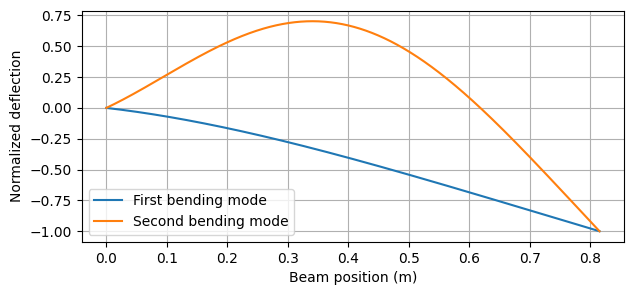

In [12]:
import matplotlib.pyplot as plt

# -------------------------------------------------
# Discretize beam length for plotting
# -------------------------------------------------

x_vals = np.linspace(0, beam_length, 1000)

psi1_curve = mode_shape(x_vals, beta1)
psi2_curve = mode_shape(x_vals, beta2)

# -------------------------------------------------
# Normalize for clear visualization
# -------------------------------------------------

psi1_norm = psi1_curve / np.max(np.abs(psi1_curve))
psi2_norm = psi2_curve / np.max(np.abs(psi2_curve))

# -------------------------------------------------
# Plot mode shapes
# -------------------------------------------------

plt.figure(figsize=(7, 3))
plt.plot(x_vals, psi1_norm, label="First bending mode")
plt.plot(x_vals, psi2_norm, label="Second bending mode")
plt.xlabel("Beam position (m)")
plt.ylabel("Normalized deflection")
plt.grid(True)
plt.legend()
plt.show()


From the preceding results, it can be assumed that at the damper location
$l_{\text{damper}} = 0.2\,\text{m}$, the first-mode contribution is much smaller than that of the second mode, that is,
$\psi_1(l_{\text{damper}}) \ll \psi_2(l_{\text{damper}})$.
Specifically, the previously computed values are

$$
\psi_1(l_{\text{damper}}) = -0.2491, \qquad
\psi_2(l_{\text{damper}}) = 0.7102,
$$

which give

$$
\psi_1^2(l_{\text{damper}}) = 0.5044, \qquad
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) = -0.1769.
$$

Since $\psi_1(l_{\text{damper}}) \ll \psi_2(l_{\text{damper}})$, the off-diagonal terms of the damping matrix
$C_{\text{damper}}$ are small and may be neglected, indicating weak modal coupling.

Accordingly, Rayleigh (proportional) damping is assumed for the system, such that

$$
C = \alpha M + \beta K.
$$

The modal damping contribution can then be written as

$$
\phi_k^{T} C \phi_k
= \alpha \phi_k^{T} M \phi_k + \beta \phi_k^{T} K \phi_k. \tag{3}
$$

Recalling the undamped eigenvalue relation

$$
(K - \omega_k^2 M)\phi_k = 0,
$$

it follows that

$$
\phi_k^{T} K \phi_k = \omega_k^2 \phi_k^{T} M \phi_k.
$$

Substituting this result into equation (3) yields

$$
\phi_k^{T} C \phi_k
= \alpha \phi_k^{T} M \phi_k
+ \beta \omega_k^2 \phi_k^{T} M \phi_k
= (\alpha + \beta \omega_k^2)\phi_k^{T} M \phi_k.
$$

Substituting into the definition of the modal damping ratio gives

$$
\zeta_k
=
\frac{(\alpha + \beta \omega_k^2)\phi_k^{T} M \phi_k}
{2\omega_k \phi_k^{T} M \phi_k}
=
\frac{1}{2}\left(\frac{\alpha}{\omega_k} + \beta \omega_k\right).
$$

Since $\psi_1(l_{\text{damper}}) \ll \psi_2(l_{\text{damper}})$, the damper is located closer to the antinode of the second mode than the first. Consequently, damping predominantly affects the second mode, particularly at higher frequencies.

Therefore, stiffness-proportional damping may be assumed for this system, such that $\alpha = 0$, giving

$$
\zeta_k = \frac{\beta \omega_k}{2}.
$$

Given that the maximum operating frequency of the exciter in the experimental setup is $17\,\text{Hz}$ and
$\omega_2 > 17\,\text{Hz}$, only the first modal damping ratio can be experimentally identified at $\omega_1$.
Using this relation, the damping coefficients can be expressed as

$$
\zeta_1 = \frac{\beta \omega_1}{2}, \qquad
\zeta_2 = \frac{\beta \omega_2}{2}
= \zeta_1 \frac{\omega_2}{\omega_1}.
$$

Finally, the damped natural response at the assumed first mode is considered, as observed experimentally.


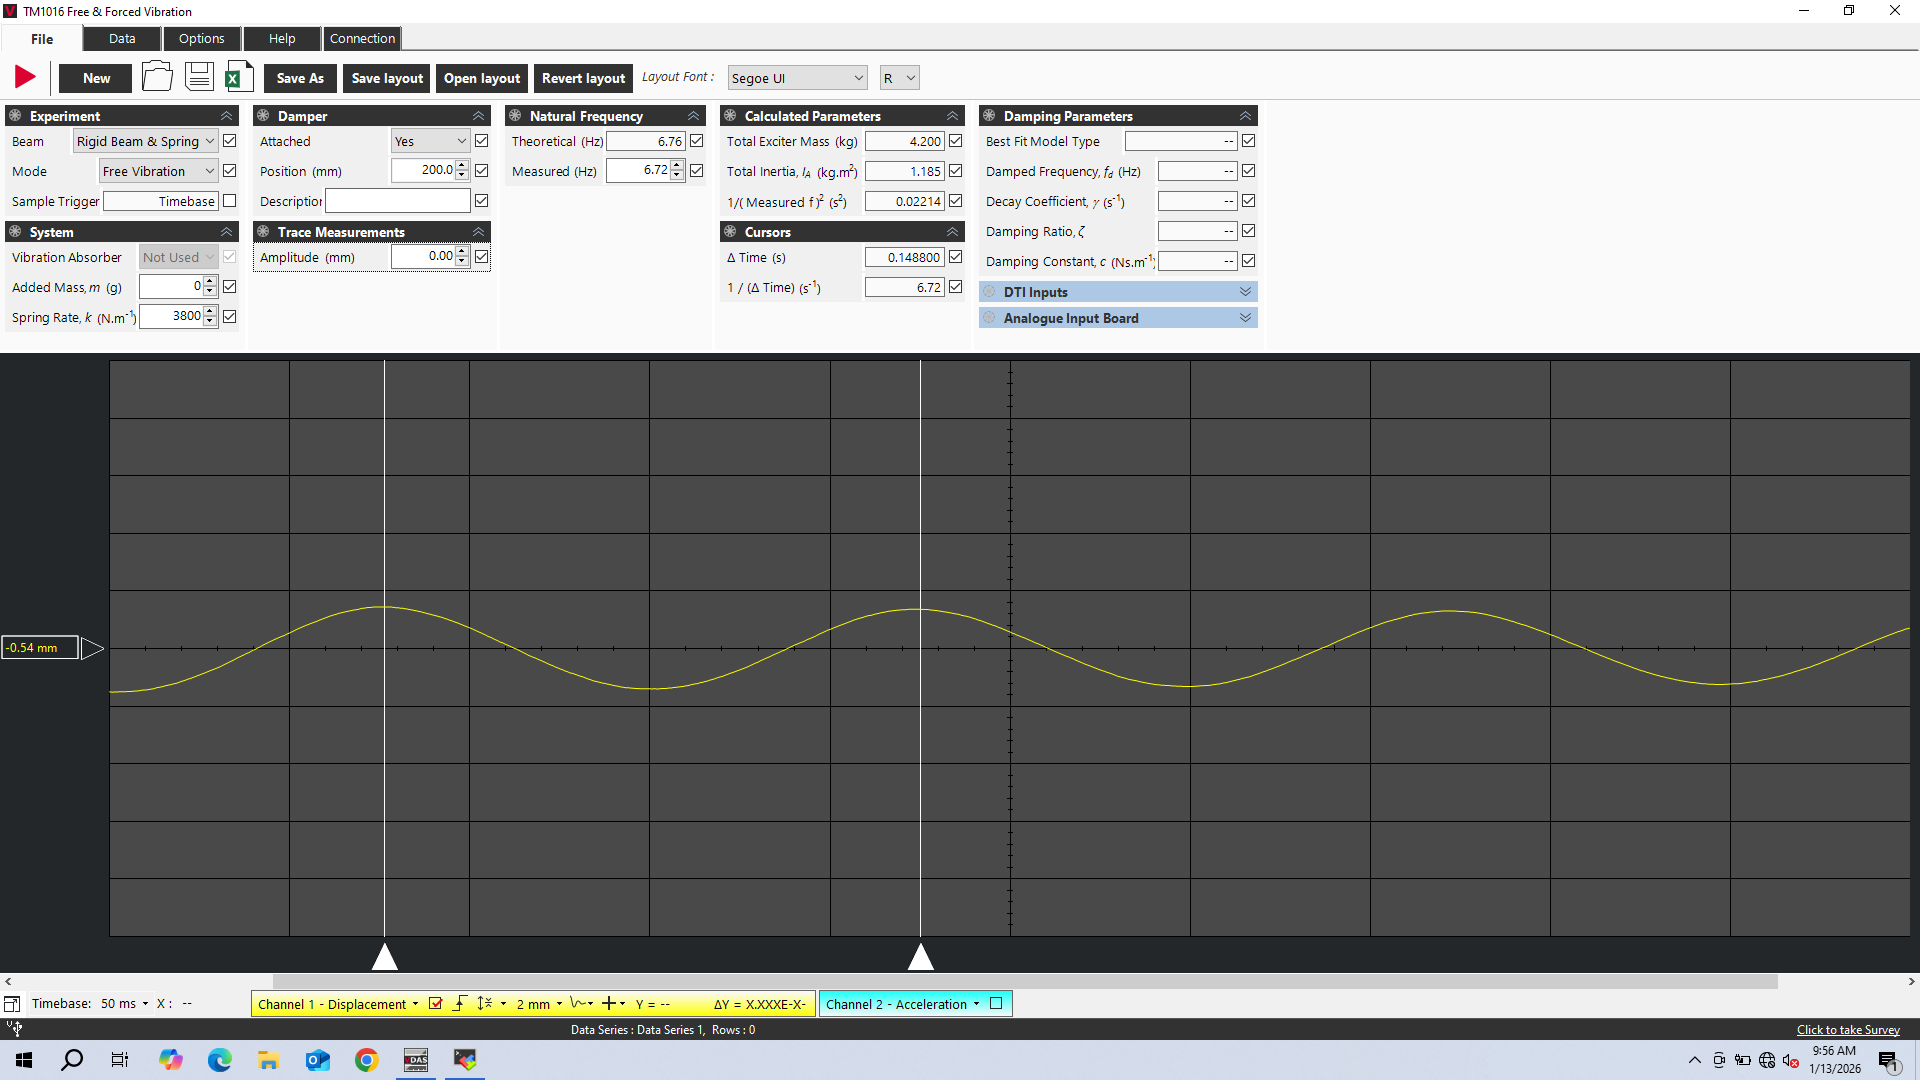

Since the initial displacement is applied at the free end of the beam, the subsequent free-decay response is primarily governed by the first vibration mode, which exhibits its maximum displacement (antinode) at the free end. Consequently, the damping ratio identified from the measured decay response corresponds to the first modal damping ratio, denoted by $\zeta_1$.

Using the proportional damping relationship, the damping ratio of the second mode can be estimated as

$$
\zeta_2 = \zeta_1 \frac{\omega_2}{\omega_1}.
$$

Substituting the numerical values of the natural frequencies gives

$$
\zeta_2 = 0.008 \times \frac{204.048~\text{rad/s}}{32.472~\text{rad/s}},
$$

which yields

$$
\zeta_2 \approx 0.05.
$$

Therefore, the estimated damping ratios corresponding to the first two dominant vibration modes are obtained as above.


\textbf{Activity 3: Graphical Representation of Selected Parameters}

\textbf{3.1 Unforced Response Due to an Initial Displacement at the Spring End of the Beam}

Starting from the modal coordinates of the complete system, the physical displacement vector can be expressed as

$$
z(t) = \Phi q(t),
$$

or equivalently,

$$
\begin{bmatrix}
z_1(t) \\
z_2(t)
\end{bmatrix}
=
\begin{bmatrix}
\phi_{11} & \phi_{12} \\
\phi_{21} & \phi_{22}
\end{bmatrix}
\begin{bmatrix}
q_1(t) \\
q_2(t)
\end{bmatrix}.
$$

Recalling the truncated two-degree-of-freedom representation of the beam displacement,

$$
y(x,t) = z_1(t)\psi_1(x) + z_2(t)\psi_2(x),
$$

the displacement field can be rewritten to account for the full system with attachments as

$$
y(x,t)
=
(\phi_{11} q_1(t) + \phi_{12} q_2(t))\psi_1(x)
+
(\phi_{21} q_1(t) + \phi_{22} q_2(t))\psi_2(x).
$$

Rearranging terms gives

$$
y(x,t)
=
(\phi_{11}\psi_1(x) + \phi_{21}\psi_2(x))q_1(t)
+
(\phi_{12}\psi_1(x) + \phi_{22}\psi_2(x))q_2(t),
$$

where the effective mode shapes of the complete system are defined as

$$
\psi_1^{*}(x) = \phi_{11}\psi_1(x) + \phi_{21}\psi_2(x), \qquad
\psi_2^{*}(x) = \phi_{12}\psi_1(x) + \phi_{22}\psi_2(x).
$$

Let the initial displacement at the beam tip be prescribed as

$$
y(l_{\text{beam}}, 0) = y_0.
$$

This leads to the relation

$$
y_0 = \psi_1^{*}(l_{\text{beam}})q_1(0) + \psi_2^{*}(l_{\text{beam}})q_2(0).
$$

Since two unknown modal coordinates are present and the initial displacement is applied at the free end of the beam, the response is assumed to be dominated by the first mode. Hence, the initial conditions reduce to

$$
q_2(0) = 0,
\qquad
q_1(0) = \frac{y_0}{\psi_1^{*}(l_{\text{beam}})}.
$$

To determine the time histories of \(q_1(t)\) and \(q_2(t)\), the following system of ordinary differential equations governing the unforced response must be solved:

$$
M_m \ddot{q} + C_m \dot{q} + K_m q = 0,
$$

which may also be written in expanded form as

$$
M_m \ddot{q} + \beta K_m \dot{q} + K_m q = 0,
$$

with the initial conditions

$$
q(0) =
\begin{bmatrix}
q_1(0) \\
0
\end{bmatrix},
\qquad
\dot{q}(0) =
\begin{bmatrix}
0 \\
0
\end{bmatrix}.
$$

Here, the parameter \(\beta\) is defined as

$$
\beta = \frac{2\zeta_1}{\omega_1} = \frac{2\zeta_2}{\omega_2}.
$$

Once the modal coordinates \(q_1(t)\) and \(q_2(t)\) have been obtained, the final expression for the damped free-vibration response is recovered by substituting back into

$$
y(x,t) = \psi_1^{*}(x)q_1(t) + \psi_2^{*}(x)q_2(t).
$$


In [14]:
# -------------------------------------------------
# Initial tip displacement
# -------------------------------------------------

initial_tip_disp = 0.003

phi11, phi12 = Phi[0, 0], Phi[0, 1]
phi21, phi22 = Phi[1, 0], Phi[1, 1]

# -------------------------------------------------
# Combined system mode shapes
# -------------------------------------------------

def system_mode_1(x):
    return phi11 * mode_shape(x, beta1) + phi21 * mode_shape(x, beta2)

def system_mode_2(x):
    return phi12 * mode_shape(x, beta1) + phi22 * mode_shape(x, beta2)

# -------------------------------------------------
# Convert physical displacement to modal coordinate
# -------------------------------------------------

q1_initial = initial_tip_disp / system_mode_1(beam_length)

print(f"Initial modal coordinate q1 = {q1_initial:.4f}")

# -------------------------------------------------
# Diagonalized mass and stiffness matrices
# -------------------------------------------------

M_modal = Phi.T @ M_total @ Phi
K_modal = Phi.T @ K_total @ Phi

# -------------------------------------------------
# Damping ratios
# -------------------------------------------------

zeta_1 = 0.008
zeta_2 = 0.05

damping_coeff = 2 * zeta_1 / natural_freqs[0]

C_modal = damping_coeff * K_modal


Initial modal coordinate q1 = 0.0035


In [15]:
from scipy.integrate import odeint

# -------------------------------------------------
# Inverse of modal mass matrix
# -------------------------------------------------

M_inv = np.linalg.inv(M_modal)

# -------------------------------------------------
# State-space ODE for free vibration
# -------------------------------------------------

def free_vibration(state, t):
    q = state[:2]
    q_dot = state[2:]

    q_ddot = M_inv @ (-C_modal @ q_dot - K_modal @ q)

    return [q_dot[0], q_dot[1], q_ddot[0], q_ddot[1]]

# -------------------------------------------------
# Initial conditions and time array
# -------------------------------------------------

initial_state = [q1_initial, 0.0, 0.0, 0.0]

time = np.arange(0, 10, 0.001)

solution = odeint(free_vibration, initial_state, time)

q1_time = solution[:, 0]
q2_time = solution[:, 1]


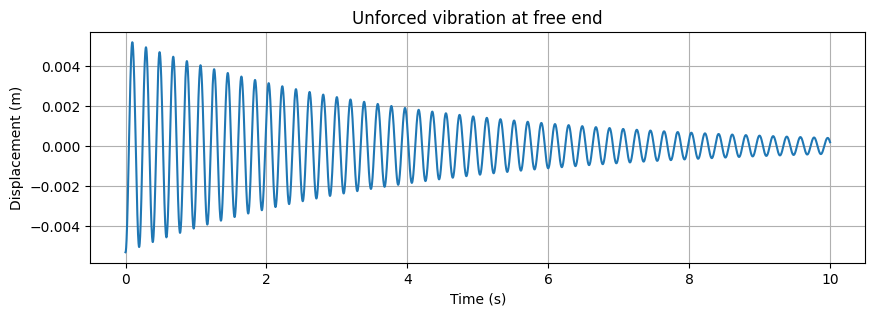

In [16]:
# -------------------------------------------------
# Recover physical displacement at beam tip
# -------------------------------------------------

psi1_tip = mode_shape(beam_length, beta1)
psi2_tip = mode_shape(beam_length, beta2)

tip_response = q1_time * psi1_tip + q2_time * psi2_tip

# -------------------------------------------------
# Plot free vibration response
# -------------------------------------------------

plt.figure(figsize=(10, 3))
plt.plot(time, tip_response)
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("Unforced vibration at free end")
plt.grid(True)
plt.show()


In [18]:
# -------------------------------------------------
# Build full displacement field y(x,t)
# -------------------------------------------------

Y_xt = np.zeros((len(time), len(x_vals)))

for i in range(len(time)):
    Y_xt[i, :] = (
        system_mode_1(x_vals) * q1_time[i] +
        system_mode_2(x_vals) * q2_time[i]
    )

# -------------------------------------------------
# Create animation of vibrating beam
# -------------------------------------------------

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(7, 3))
ax.set_xlim(0, beam_length)

max_amp = np.max(np.abs(Y_xt)) * 1.1
ax.set_ylim(-max_amp, max_amp)

ax.set_xlabel("Beam length (m)")
ax.set_ylabel("Displacement (m)")
ax.set_title("Free vibration of beam")
ax.grid(True)

line, = ax.plot([], [], lw=2)

def init_anim():
    line.set_data([], [])
    return line,

def update_frame(i):
    line.set_data(x_vals, Y_xt[i, :])
    return line,

frame_skip = 10
frame_ids = range(0, len(time), frame_skip)

beam_animation = FuncAnimation(
    fig,
    update_frame,
    init_func=init_anim,
    frames=frame_ids,
    interval=int((time[1] - time[0]) * frame_skip * 1000),
    blit=True
)

plt.close(fig)
HTML(beam_animation.to_html5_video())


\textbf{3.2 Forced Response for Three Selected Motor Rotation Speeds}

We now consider the forced vibration response of the complete reduced-order system.  
The governing equations in modal coordinates are given by

$$
M_m \ddot{q} + C_m \dot{q} + K_m q = F_m,
$$

where the modal forcing vector is defined as

$$
F_m = \Phi^{T} F_{\text{exciter}},
$$

and the physical excitation force applied by the motor is expressed as

$$
F_{\text{exciter}} =
\begin{bmatrix}
Q(\Omega)\psi_1(l_{\text{exciter}})\sin(\Omega t) \\
Q(\Omega)\psi_2(l_{\text{exciter}})\sin(\Omega t)
\end{bmatrix}.
$$

The excitation amplitude due to the rotating unbalance of the motor can be written as

$$
Q(\Omega) = m_{\text{ecc}}\, r\, \Omega^{2},
$$

where \(m_{\text{ecc}}\) denotes the eccentric mass and \(r\) is the radial offset of the eccentric mass associated with the servomotor exciter.

The resulting system of non-homogeneous ordinary differential equations can then be solved to obtain the particular solution \(q(t)\) corresponding to the applied harmonic forcing. Once the modal responses are determined, the physical displacement response of the beam can be reconstructed for plotting purposes using

$$
y(x,t) = \psi_1^{*}(x)q_1(t) + \psi_2^{*}(x)q_2(t).
$$


In [19]:
# -------------------------------------------------
# Excitation angular speeds (rad/s)
# -------------------------------------------------

Omega_low  = 32.472      # close to first resonance
Omega_mid  = 100.0
Omega_high = 204.048    # close to second resonance

Omega_values = [Omega_low, Omega_mid, Omega_high]

# -------------------------------------------------
# Eccentric mass forcing parameters
# -------------------------------------------------

ecc_mass = 0.0045
offset_radius = 0.035

def excitation_force(ecc_mass, r, Omega):
    return 2 * ecc_mass * r * Omega**2


In [20]:
# -------------------------------------------------
# Time vector for forced response
# -------------------------------------------------

time_forced = np.arange(0, 7.5, 0.001)

# -------------------------------------------------
# ODE including harmonic forcing
# -------------------------------------------------

def forced_vibration(state, t, Omega, Q, psi_star):
    q = state[:2]
    q_dot = state[2:]

    force_vector = psi_star * Q * np.sin(Omega * t)

    q_ddot = M_inv @ (force_vector - C_modal @ q_dot - K_modal @ q)

    return [q_dot[0], q_dot[1], q_ddot[0], q_ddot[1]]

# -------------------------------------------------
# Initial conditions
# -------------------------------------------------

initial_forced = [0.0, 0.0, 0.0, 0.0]

psi_at_exciter = np.array([
    system_mode_1(exciter_location),
    system_mode_2(exciter_location)
])

# -------------------------------------------------
# Solve for each excitation speed
# -------------------------------------------------

forced_solutions = []

for Omega in Omega_values:
    Q_val = excitation_force(ecc_mass, offset_radius, Omega)

    sol = odeint(forced_vibration, initial_forced, time_forced,
                 args=(Omega, Q_val, psi_at_exciter))

    forced_solutions.append(sol)


In [21]:
# -------------------------------------------------
# Animate beam response for each forcing frequency
# -------------------------------------------------

for idx, Omega in enumerate(Omega_values):

    sol = forced_solutions[idx]

    q1_f = sol[:, 0]
    q2_f = sol[:, 1]

    Y_forced = np.zeros((len(time_forced), len(x_vals)))

    for i in range(len(time_forced)):
        Y_forced[i, :] = (
            system_mode_1(x_vals) * q1_f[i] +
            system_mode_2(x_vals) * q2_f[i]
        )

    fig, ax = plt.subplots(figsize=(7, 3))
    ax.set_xlim(0, beam_length)

    ymax = np.max(np.abs(Y_forced)) * 1.1
    ax.set_ylim(-ymax, ymax)

    ax.set_xlabel("Beam length (m)")
    ax.set_ylabel("Displacement (m)")
    ax.set_title(f"Forced vibration response (Ω = {Omega:.2f} rad/s)")
    ax.grid(True)

    line, = ax.plot([], [], lw=2)

    def animate_forced(i):
        line.set_data(x_vals, Y_forced[i, :])
        return line,

    anim = FuncAnimation(
        fig,
        animate_forced,
        frames=range(0, len(time_forced), 10),
        interval=20,
        blit=True
    )

    plt.close(fig)
    display(HTML(anim.to_html5_video()))


**3.3 Theoretical Frequency Response of the System Capturing the First Two Dominant Modes**

The frequency response function of the system is defined as the ratio between the steady-state displacement amplitude and the applied force amplitude, given by

$$
G(x,\Omega) = \frac{Y(x,\Omega)}{Q(\Omega)}.
$$

To incorporate the effects of the attachments into the modal response, the modal amplitude and phase can be expressed as

$$
\chi_k(\Omega)
=
\left|
\frac{Q(\Omega)\psi_k(l_{\text{exciter}})}
{M_{m,k}\sqrt{(\omega_k^2 - \Omega^2)^2 + 4\zeta_k^2\Omega^2\omega_k^2}}
\right|,
$$

and

$$
\phi_k(\Omega)
=
\arctan\!\left(
\frac{2\zeta_k\Omega\omega_k}{\omega_k^2 - \Omega^2}
\right).
$$

Here, \(\omega_k\) and \(\zeta_k\) represent the natural frequencies and damping ratios of the complete system with attachments.

The physical displacement response may then be written in modal form as

$$
y(x,t) = \psi_1^{*}(x)q_1(t) + \psi_2^{*}(x)q_2(t),
$$

where the modal coordinates under harmonic excitation are given by

$$
q_k(t) = \chi_k(\Omega)\cos\big(\Omega t + \phi_k(\Omega)\big).
$$

Substituting these expressions into the displacement equation yields

$$
y(x,t)
=
\chi_1(\Omega)\cos(\Omega t + \phi_1(\Omega))\psi_1^{*}(x)
+
\chi_2(\Omega)\cos(\Omega t + \phi_2(\Omega))\psi_2^{*}(x).
$$

Using the identity
\(
\cos(\Omega t + \phi) = \Re\{e^{j(\Omega t + \phi)}\},
\)
the displacement can be rewritten in complex form as

$$
y(x,t)
=
\Re\left\{
\left[
\chi_1(\Omega)\psi_1^{*}(x)e^{j\phi_1(\Omega)}
+
\chi_2(\Omega)\psi_2^{*}(x)e^{j\phi_2(\Omega)}
\right]e^{j\Omega t}
\right\}.
$$

Factoring out the time-dependent exponential term allows the frequency-domain displacement to be identified as

$$
Y(x,\Omega)
=
\chi_1(\Omega)\psi_1^{*}(x)e^{j\phi_1(\Omega)}
+
\chi_2(\Omega)\psi_2^{*}(x)e^{j\phi_2(\Omega)}.
$$

Recalling that the magnitude and phase information are embedded in the complex form of the modal response, the frequency-domain displacement may be written explicitly as

$$
Y(x,\Omega)
=
\frac{Q(\Omega)\psi_1(l_{\text{exciter}})\psi_1^{*}(x)}
{M_{m,1}\big[(\omega_1^2 - \Omega^2) + j2\zeta_1\Omega\omega_1\big]}
+
\frac{Q(\Omega)\psi_2(l_{\text{exciter}})\psi_2^{*}(x)}
{M_{m,2}\big[(\omega_2^2 - \Omega^2) + j2\zeta_2\Omega\omega_2\big]}.
$$

Dividing through by the force amplitude \(Q(\Omega)\), the frequency response function is finally obtained as

$$
G(x,\Omega)
=
\frac{\psi_1(l_{\text{exciter}})\psi_1^{*}(x)}
{M_{m,1}\big[(\omega_1^2 - \Omega^2) + j2\zeta_1\Omega\omega_1\big]}
+
\frac{\psi_2(l_{\text{exciter}})\psi_2^{*}(x)}
{M_{m,2}\big[(\omega_2^2 - \Omega^2) + j2\zeta_2\Omega\omega_2\big]}.
$$

Through this expression, the magnitude of \(G(x,\Omega)\) provides the displacement amplitude response, while the argument of \(G(x,\Omega)\) gives the corresponding phase response of the system.


In [22]:
# -------------------------------------------------
# Observation points along beam
# -------------------------------------------------

x_obs1 = beam_length
x_obs2 = damper_location
x_obs3 = 0.5

observation_points = np.array([x_obs1, x_obs2, x_obs3])

psi1_vals = np.array([system_mode_1(x) for x in observation_points])
psi2_vals = np.array([system_mode_2(x) for x in observation_points])

psi1_exc = system_mode_1(exciter_location)
psi2_exc = system_mode_2(exciter_location)

w1_sys, w2_sys = natural_freqs
M11, M22 = M_modal[0,0], M_modal[1,1]


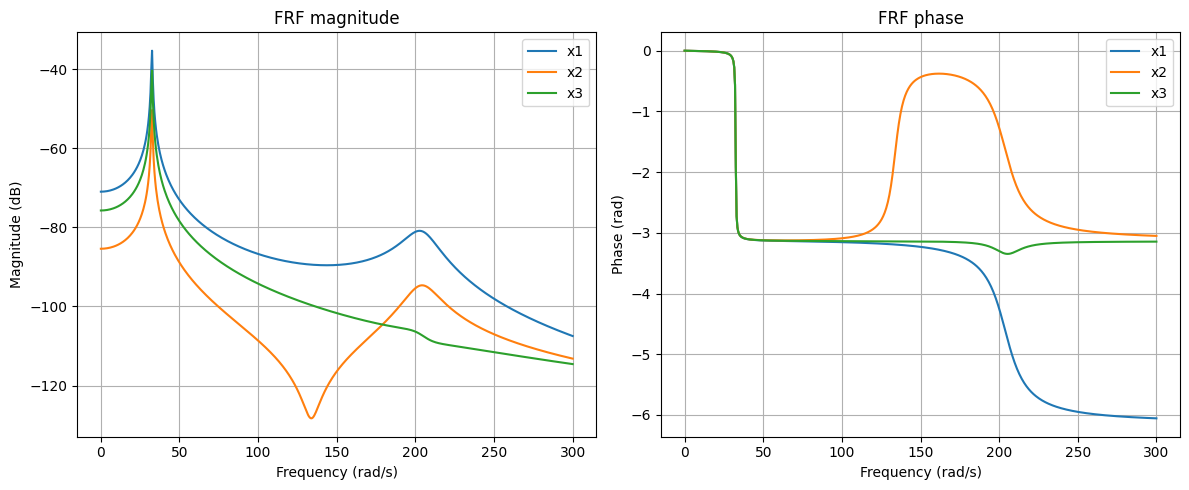

In [23]:
# -------------------------------------------------
# Frequency sweep range
# -------------------------------------------------

Omega_scan = np.linspace(0.01, 300, 600)

FRF = np.zeros((3, len(Omega_scan)), dtype=complex)

def transfer_function(idx, Omega):
    d1 = (w1_sys**2 - Omega**2) + 1j*(2*zeta_1*Omega*w1_sys)
    d2 = (w2_sys**2 - Omega**2) + 1j*(2*zeta_2*Omega*w2_sys)

    term1 = (psi1_exc * psi1_vals[idx]) / (M11 * d1)
    term2 = (psi2_exc * psi2_vals[idx]) / (M22 * d2)

    return term1 + term2

for i in range(3):
    for j, Omega in enumerate(Omega_scan):
        FRF[i, j] = transfer_function(i, Omega)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Magnitude plot
for i in range(3):
    axes[0].plot(Omega_scan, 20*np.log10(np.abs(FRF[i])), label=f"x{i+1}")

axes[0].set_xlabel("Frequency (rad/s)")
axes[0].set_ylabel("Magnitude (dB)")
axes[0].set_title("FRF magnitude")
axes[0].legend()
axes[0].grid(True)

# Phase plot
for i in range(3):
    axes[1].plot(Omega_scan, np.unwrap(np.angle(FRF[i])), label=f"x{i+1}")

axes[1].set_xlabel("Frequency (rad/s)")
axes[1].set_ylabel("Phase (rad)")
axes[1].set_title("FRF phase")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


**Activity 4: Experimental Characterisation of the System Frequency Response Near Resonance — Determination of \(\omega_d\) and \(y_{\max}\) with Theoretical Comparison**

To ensure a valid comparison between experimental and theoretical results, the response analysis is performed at the same spatial location on the beam. Accordingly, the observation point is selected as \(x = 0.5\,\text{m}\), corresponding to the position of the displacement sensor in the experimental setup.

It should be noted that the displacement sensor is located close to a nodal point of the second vibration mode. As a result, the frequency characteristics associated with the second mode are not evident in the experimental measurements, which is consistent with the predictions obtained from the theoretical \(\psi_2\) mode shape.

Moreover, since the maximum excitation frequency of the motor is limited to \(17\,\text{Hz}\), the experimental investigation is confined to the characterisation of the first resonant mode.

\textbf{Experimental Frequency Response}
